In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_path='C:/Users/User/Documents/application_train.csv'
f_app=os.path.join(data_path)
app_train=pd.read_csv(f_app)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 找出'int','float'型別資料
dtype_feature=[np.dtype('int64'),np.dtype('float64')]
# 檢查數值型資料對應的特徵
print(app_train.dtypes.isin(dtype_feature))
feature_col=list(app_train.columns[list(app_train.dtypes.isin(dtype_feature))])


SK_ID_CURR                     True
TARGET                         True
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 122, dtype: bool


In [8]:
feature_col

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MED

In [6]:
# 拿掉只有兩個唯一值的欄位 (True/False)
# 列出數值型資料中是否不於2 (NA值)
filter_columns=app_train[feature_col].apply(lambda x: len(x.unique())!=2)
print(filter_columns)
# 過濾出不等於2的特徵
feature_col=list(app_train[feature_col].columns[filter_columns])
feature_col

SK_ID_CURR                     True
TARGET                        False
CNT_CHILDREN                   True
AMT_INCOME_TOTAL               True
AMT_CREDIT                     True
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 106, dtype: bool


['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MED

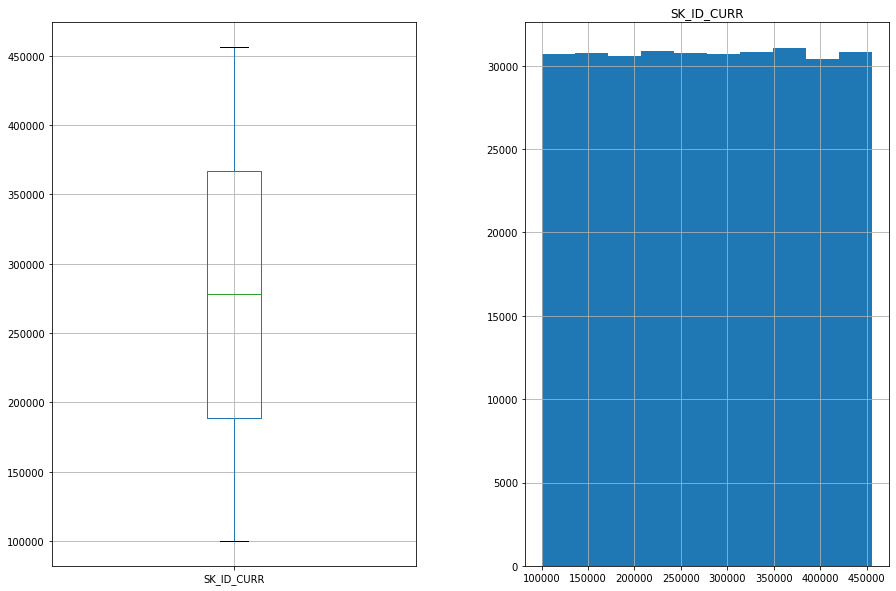

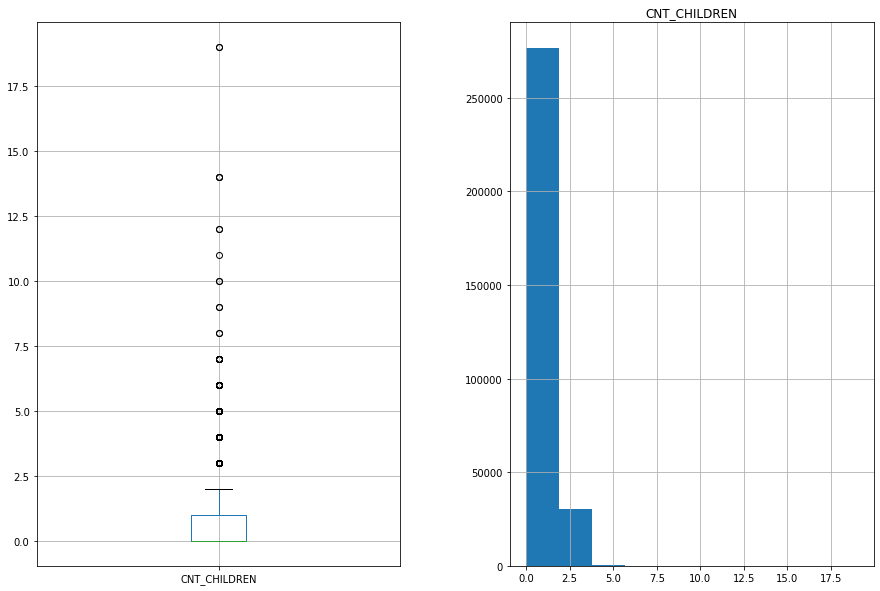

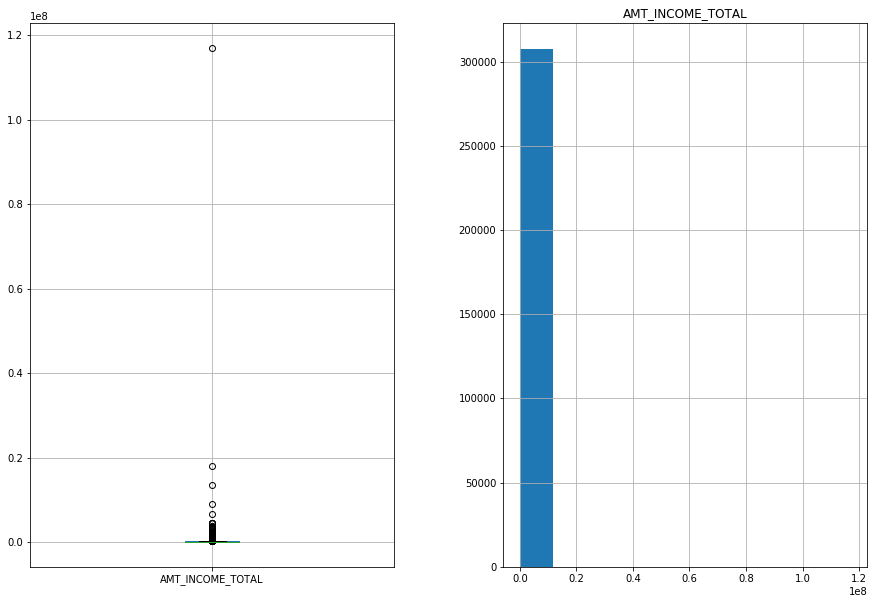

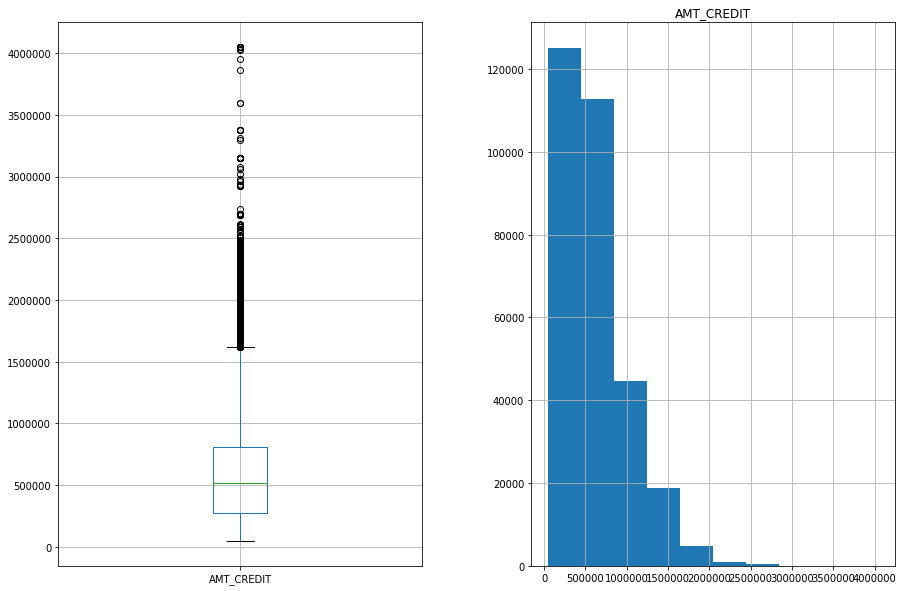

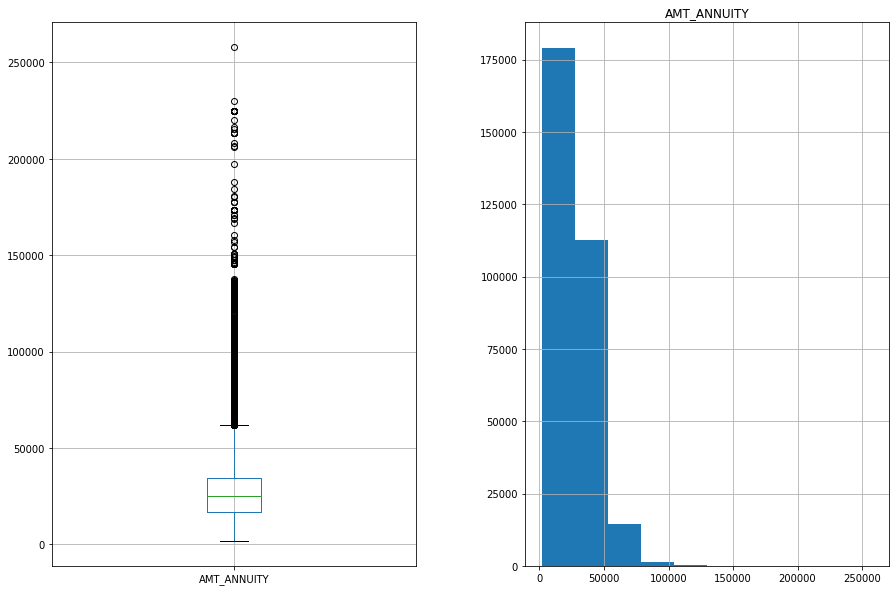

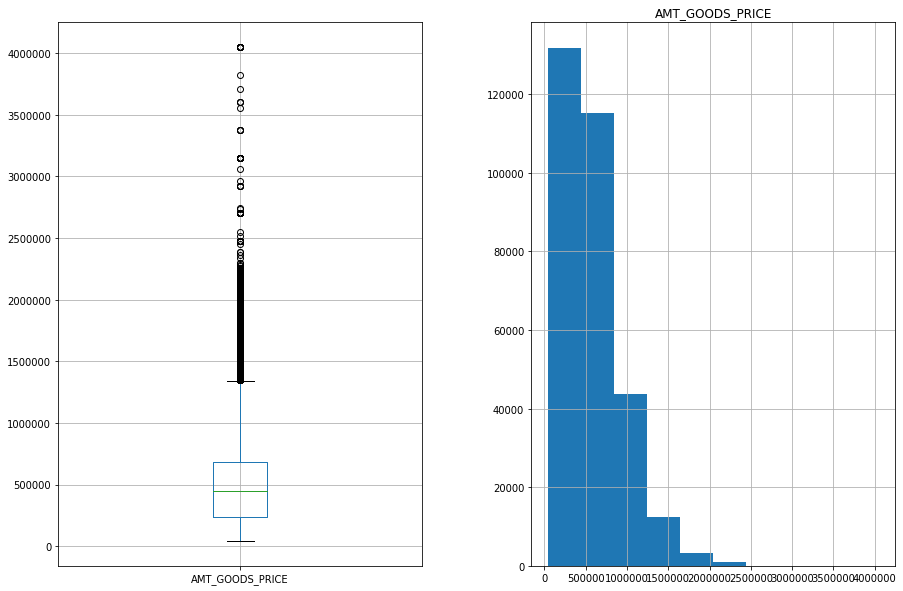

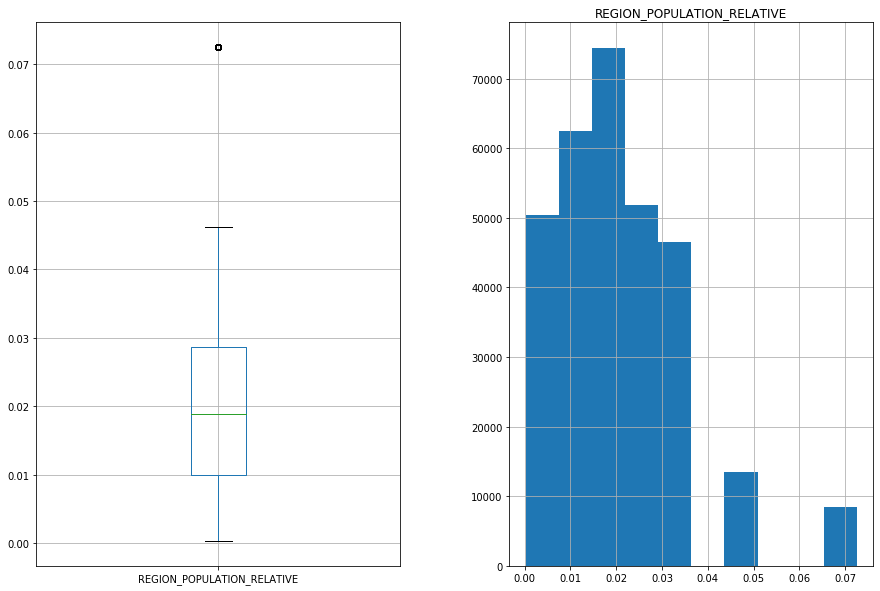

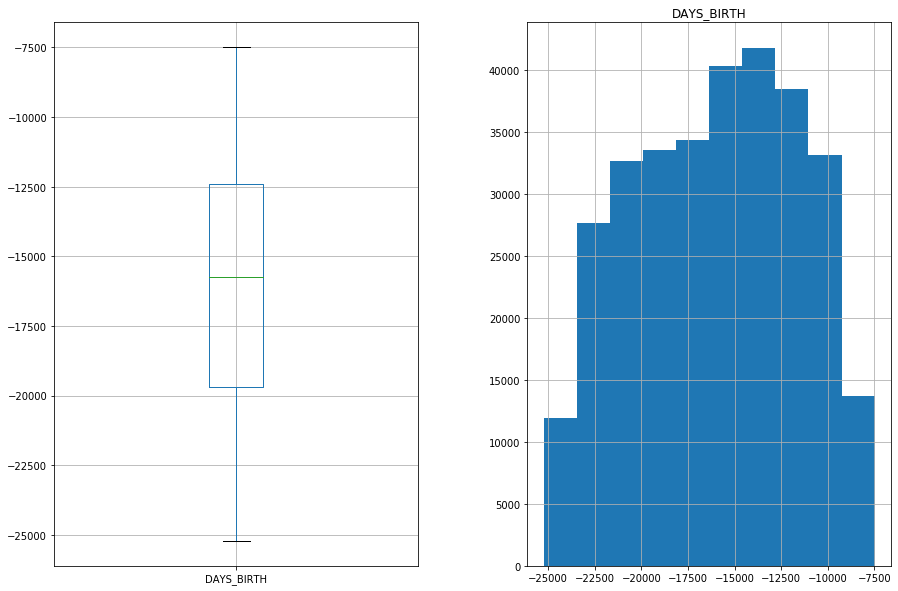

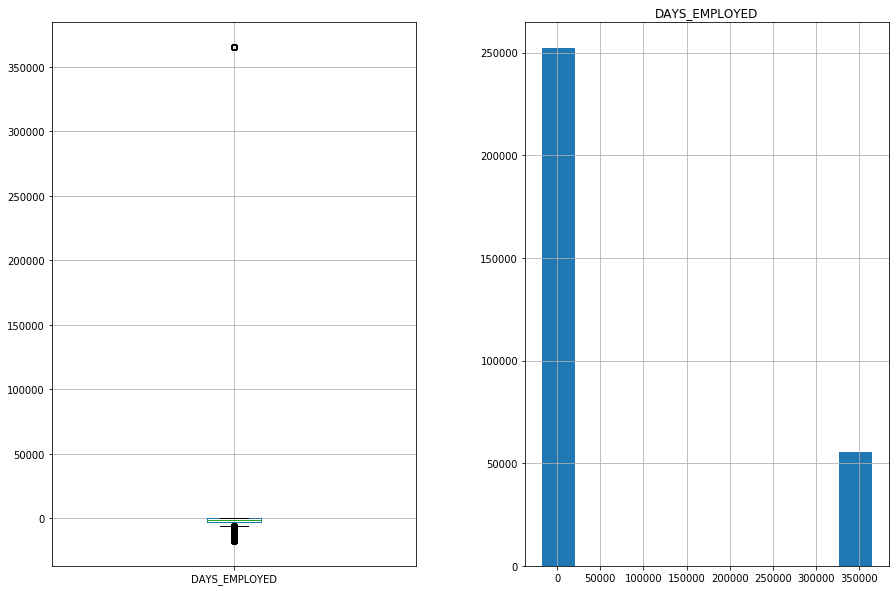

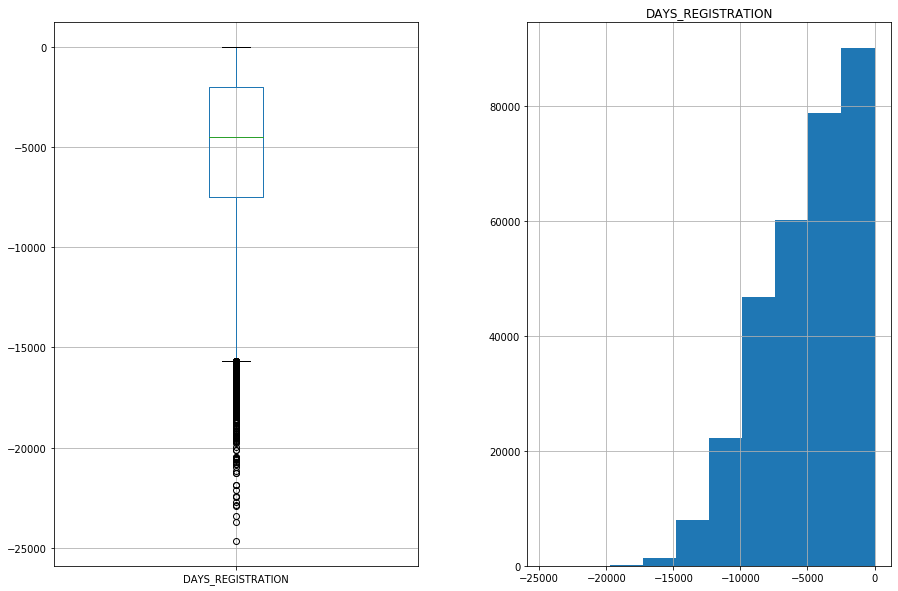

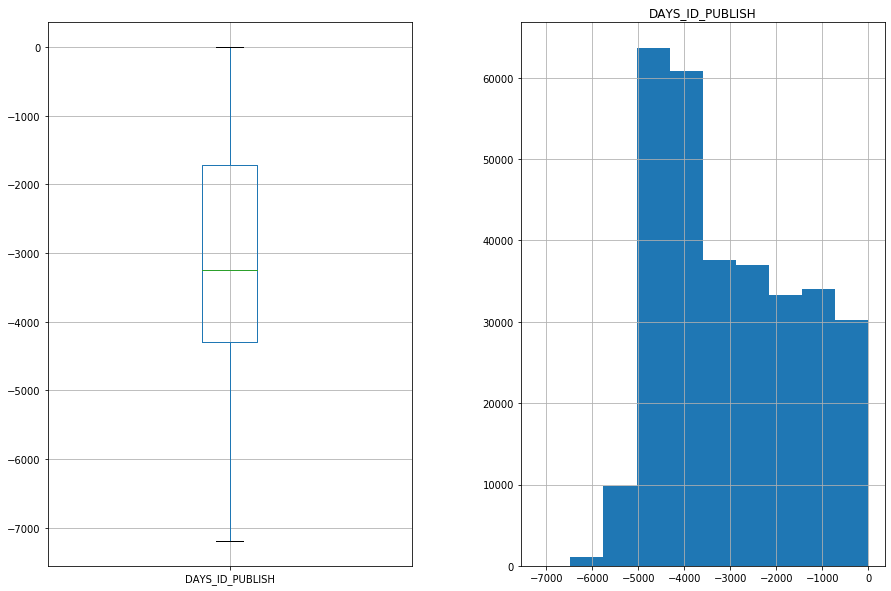

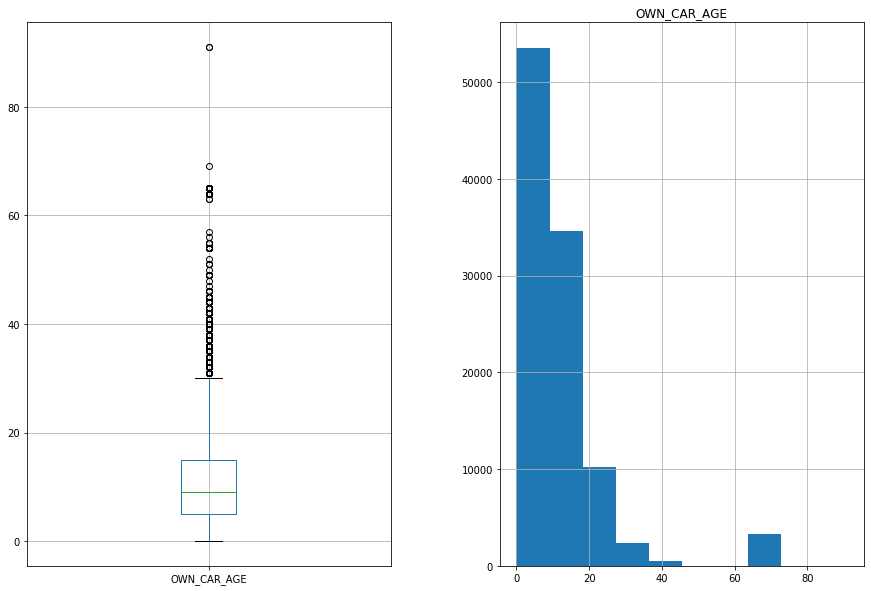

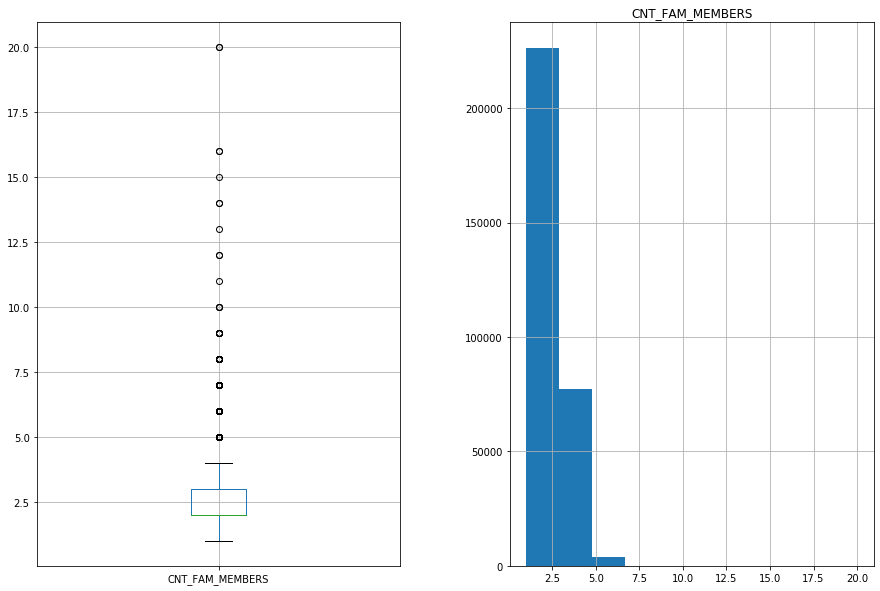

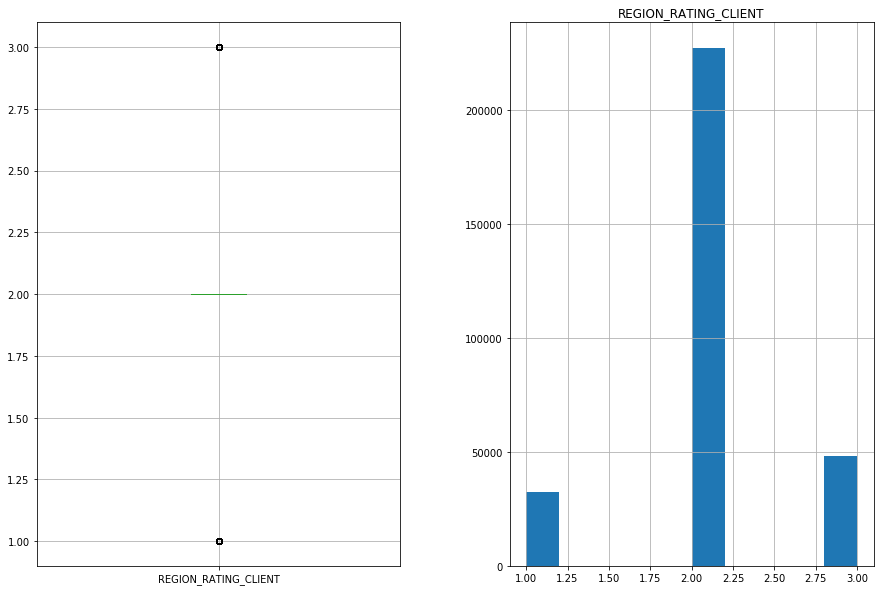

KeyboardInterrupt: 

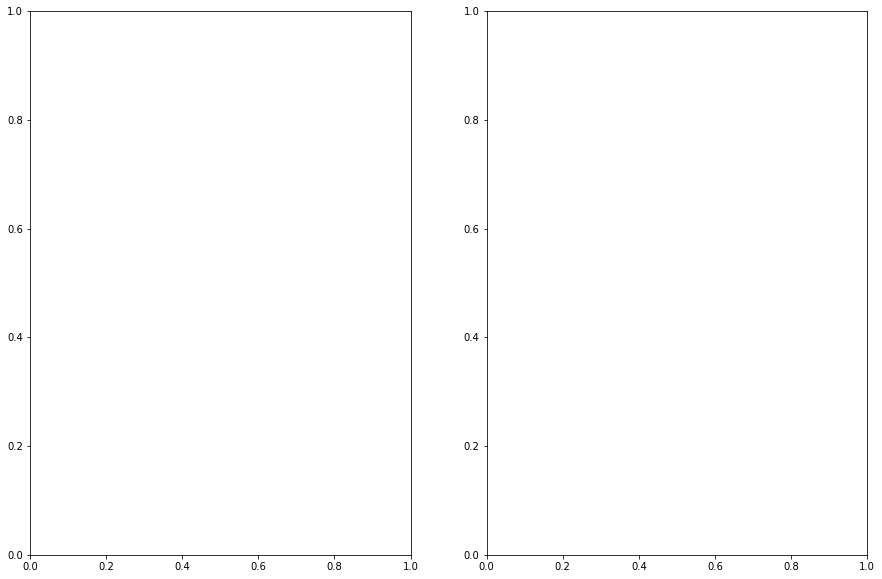

In [7]:
# 以箱型圖、長條圖視覺化資料
for i in feature_col:
    fig=plt.figure(figsize=(15,10))
    ax1=fig.add_subplot(121)
    ax2=fig.add_subplot(122)
    app_train.boxplot(column=i, ax=ax1)
    app_train.hist(column=i, ax=ax2)
    plt.show()

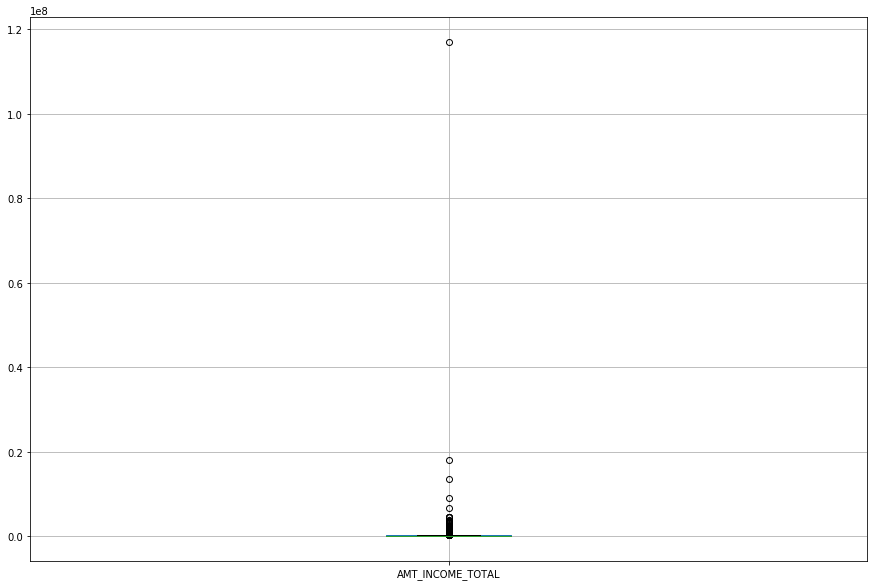

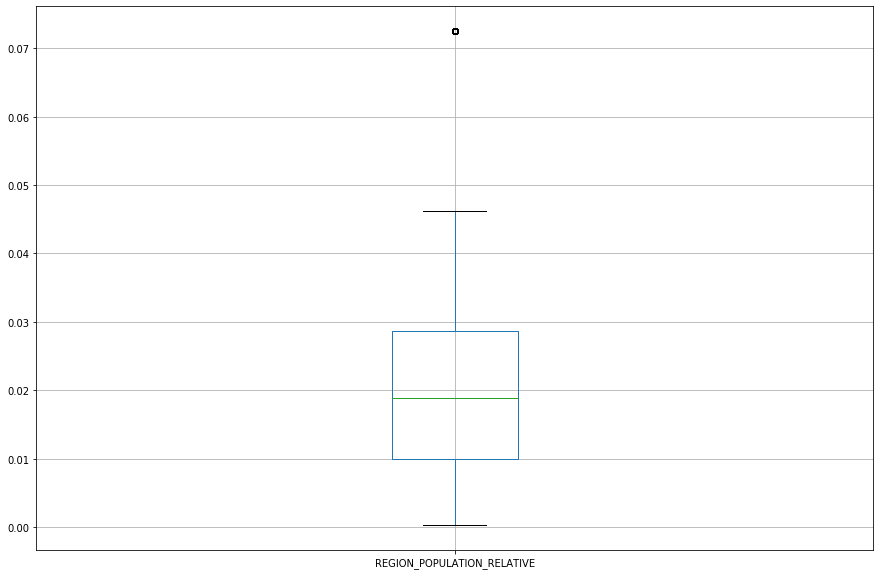

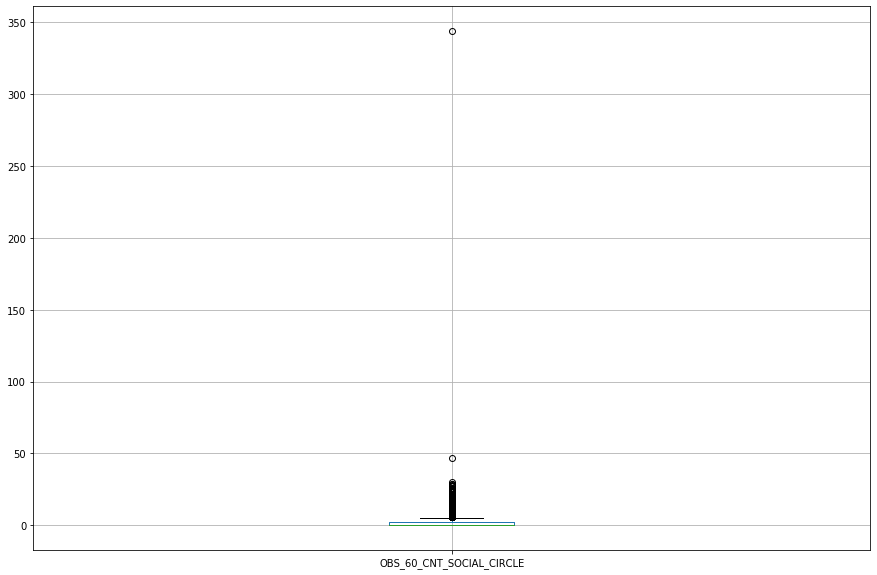

In [10]:
# 針對三個可疑的特徵進行檢視
for j in ['AMT_INCOME_TOTAL','REGION_POPULATION_RELATIVE','OBS_60_CNT_SOCIAL_CIRCLE']:
    fig=plt.figure(figsize=(15,10))
    app_train.boxplot(column=j)
    plt.show()

In [8]:
# 從上圖發現，AMT_INCOME_TOTAL中有明顯異常大之值
# 觀察此資料最大，最小，中位數
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

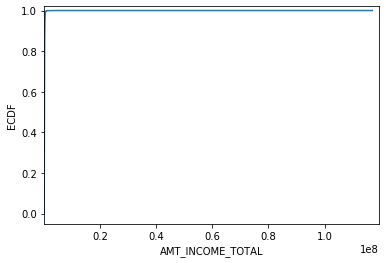

In [9]:
# 繪製經驗分布函數
# sort_index :根據index排序
# cumsum():累加函數
cdf=app_train['AMT_INCOME_TOTAL'].value_counts().sort_index().cumsum()

plt.plot(list(cdf.index),cdf/cdf.max())
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('ECDF')

# 限制X軸和Y軸範圍
plt.xlim(cdf.index.min(),cdf.index.max()*1.02)
plt.ylim([-0.05,1.02])
plt.show()

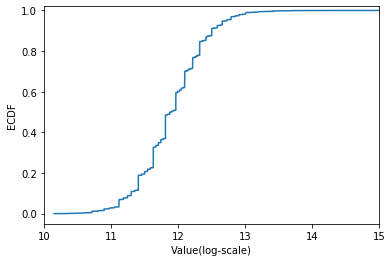

In [10]:
# 改變y軸scle，檢視ECDF
plt.plot(np.log(list(cdf.index)),cdf/cdf.max())
plt.xlabel('Value(log-scale)')
plt.ylabel('ECDF')
plt.xlim([10,15])
plt.ylim([-0.05,1.02])
plt.show()

In [11]:
# REGION_POPULATION_RELATIVE 問題
app_train['REGION_POPULATION_RELATIVE'].describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

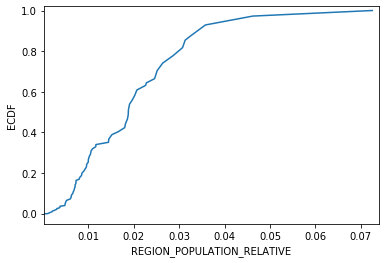

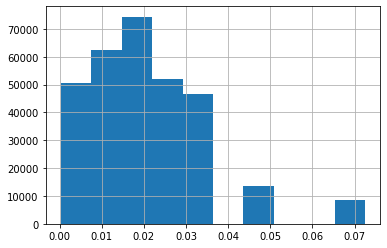

0.000290        2
0.000533       39
0.000938       28
0.001276      558
0.001333      235
            ...  
0.031329    11321
0.032561     6636
0.035792    16408
0.046220    13442
0.072508     8412
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

In [31]:
cdf=app_train['REGION_POPULATION_RELATIVE'].value_counts().sort_index().cumsum()

plt.plot(list(cdf.index),cdf/cdf.max())
plt.xlabel('REGION_POPULATION_RELATIVE')
plt.ylabel('ECDF')

# 限制X軸和Y軸範圍
plt.xlim(cdf.index.min(),cdf.index.max()*1.02)
plt.ylim([-0.05,1.02])
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts().sort_index()

In [12]:
# OBS_60_CNT_SOCIAL_CIRCLE 問題
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

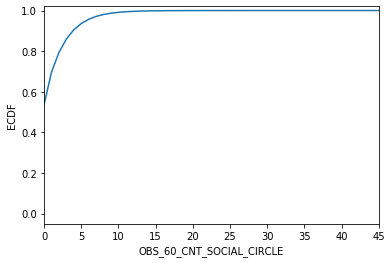

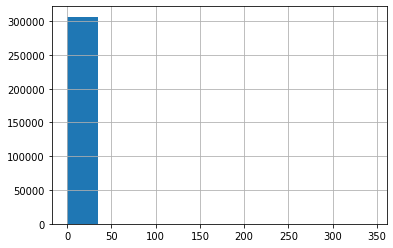

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
26.0          1
27.0          5
28.0          1
29.0          2
30.0          1
47.0          1
344.0         1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [43]:
cdf=app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index().cumsum()
cdf
plt.plot(list(cdf.index),cdf/cdf.max())
plt.xlabel('OBS_60_CNT_SOCIAL_CIRCLE')
plt.ylabel('ECDF')

# 限制X軸和Y軸範圍
# plt.xlim(cdf.index.min(),cdf.index.max()*1.05)
plt.xlim([0,45])
plt.ylim([-0.05,1.02])
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index()